Para los gráficos visuales se utilizo como guia Keggle, basandose en los desafíos que los usuarios suben sobre el dataset utilizado.
Se utilizó articulos de chatgtp y también, clases del profesor del Bootcamp.

# Fundamentos de Data Science

In [93]:
# importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Para eliminación de duplicados se asume que el dataset  contiene o debería contener 1  opinión por cada persona/dispositivo. Ya que puede haber muchos usuarios con mismo nombre.

## Limpieza de datos con Python:

In [127]:
# carga del dataset a ser utilizado
df_hotel_bookings= pd.read_csv(r'hotel_bookings.csv')  # Se adjunta el archivo en el repositorio a corregir
# Se verifica existencia de valores nulls
info = df_hotel_bookings.info()  
# Verificación de duplicados 
duplicados = df_hotel_bookings.duplicated()
df_duplicados = df_hotel_bookings[duplicados]
info_duplicados = df_duplicados.shape
# Consulta duplicados
print(f'\nVerificación de duplicados: {info_duplicados}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [95]:
# Consultamos los campos con valores nulls para su respectiva transformación y corrección.
df_hotel_bookings_nulls = df_hotel_bookings.isnull().sum()
df_hotel_nulls_presents = df_hotel_bookings_nulls[df_hotel_bookings_nulls > 0] # Filtramos solo campos con  al menos un valor registrado como null
print(df_hotel_nulls_presents)

children         4
country        488
agent        16340
company     112593
dtype: int64


In [99]:
# Rellenar valores faltantes
def rellenar_valores_faltantes(df):
    for column in df.columns:
        if df[column].isnull().any():  # Procesar solo columnas con valores faltantes
            if df[column].dtype == 'object':  # Si la columna es de tipo texto
                df[column].fillna('undefined', inplace=True)  # Rellenar con 'undefined'
            elif df[column].dtype in ['int64', 'float64']:  # Si la columna es numérica
                df[column].fillna(0, inplace=True)
    return df  # Retornar el DataFrame modificado

# Llamar a la función para rellenar valores faltantes
df_hotel_bookings = rellenar_valores_faltantes(df_hotel_bookings)

# Eliminar duplicados
df_hotel_bookings.drop_duplicates(inplace=True)

# Convertir campos categóricos a mayúsculas
df_hotel_bookings[['hotel', 'arrival_date_month', 'deposit_type', 
                   'company', 'customer_type', 
                   'reservation_status']] = \
    df_hotel_bookings[['hotel', 'arrival_date_month', 'deposit_type', 
                       'company', 'customer_type', 
                       'reservation_status']].apply(
        lambda x: x.astype(str).str.upper().str.strip()
)

# Validación de cambios realizados
display(df_hotel_bookings)

# Consultar información del DataFrame para validar nulls
print(df_hotel_bookings.info())


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,RESORT HOTEL,0,342,2015,JULY,27,1,0,0,2,...,NO DEPOSIT,0.0,NAN,0,TRANSIENT,0.00,0,0,CHECK-OUT,2015-07-01
1,RESORT HOTEL,0,737,2015,JULY,27,1,0,0,2,...,NO DEPOSIT,0.0,NAN,0,TRANSIENT,0.00,0,0,CHECK-OUT,2015-07-01
2,RESORT HOTEL,0,7,2015,JULY,27,1,0,1,1,...,NO DEPOSIT,0.0,NAN,0,TRANSIENT,75.00,0,0,CHECK-OUT,2015-07-02
3,RESORT HOTEL,0,13,2015,JULY,27,1,0,1,1,...,NO DEPOSIT,304.0,NAN,0,TRANSIENT,75.00,0,0,CHECK-OUT,2015-07-02
4,RESORT HOTEL,0,14,2015,JULY,27,1,0,2,2,...,NO DEPOSIT,240.0,NAN,0,TRANSIENT,98.00,0,1,CHECK-OUT,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,CITY HOTEL,0,23,2017,AUGUST,35,30,2,5,2,...,NO DEPOSIT,394.0,NAN,0,TRANSIENT,96.14,0,0,CHECK-OUT,2017-09-06
119386,CITY HOTEL,0,102,2017,AUGUST,35,31,2,5,3,...,NO DEPOSIT,9.0,NAN,0,TRANSIENT,225.43,0,2,CHECK-OUT,2017-09-07
119387,CITY HOTEL,0,34,2017,AUGUST,35,31,2,5,2,...,NO DEPOSIT,9.0,NAN,0,TRANSIENT,157.71,0,4,CHECK-OUT,2017-09-07
119388,CITY HOTEL,0,109,2017,AUGUST,35,31,2,5,2,...,NO DEPOSIT,89.0,NAN,0,TRANSIENT,104.40,0,0,CHECK-OUT,2017-09-07


<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

## Exploración de datos con Python

### Visualización univariada 1

<Axes: xlabel='reserved_room_type', ylabel='Count'>

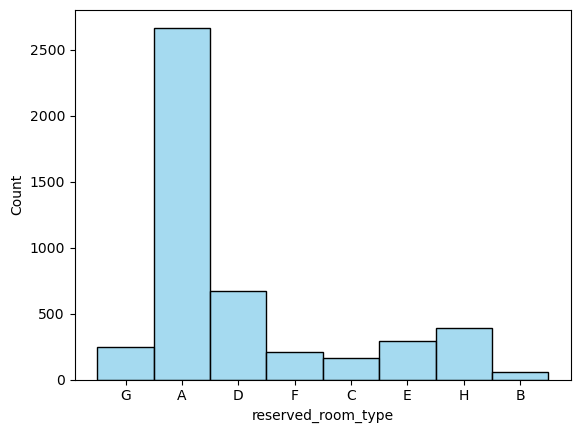

In [100]:
has_children = df[df_hotel_bookings['children']==1]
sns.histplot(has_children['reserved_room_type'], color='skyblue')

Basado en el gráfico anterior, se puedde visualizar que la habitqación reservada más comúnmente por los huéspedes con niños es el tipo A. No significa que la habitación del tipo A sea la más cómoda. Simplemente puede que esté mayormente disponible.

### Visualización univariada 2

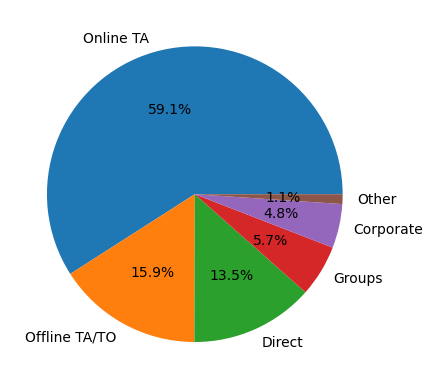

In [102]:
segment_counts = df_hotel_bookings['market_segment'].value_counts()

total = segment_counts.sum()
minimum = 0.01 * total

too_small = segment_counts[segment_counts < minimum].sum()
segment_counts = segment_counts[segment_counts >= minimum]
segment_counts['Other'] = too_small

plt.pie(segment_counts, labels = segment_counts.index, autopct='%1.1f%%')
plt.show()

Se puede observar que el segmento con más reservaciones es del tipo Online TA. Asumimos que las reservas, mayormente se realizan vía online. 

### Visualización multivariada 1

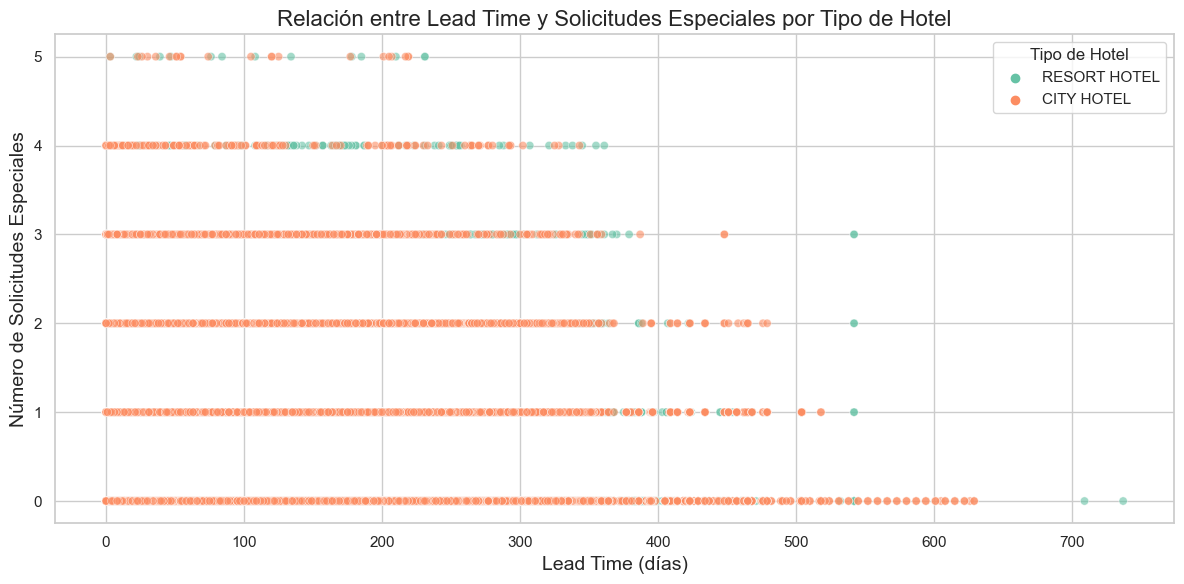

In [119]:
# Configurar el estilo de seaborn
sns.set(style='whitegrid')

# Crear un gráfico de dispersión
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=df_hotel_bookings,
    x='lead_time',
    y='total_of_special_requests',
    hue='hotel',
    alpha=0.6,
    palette='Set2'
)

# Personalizar el gráfico
plt.title('Relación entre Lead Time y Solicitudes Especiales por Tipo de Hotel', fontsize=16)
plt.xlabel('Lead Time (días)', fontsize=14)
plt.ylabel('Número de Solicitudes Especiales', fontsize=14)
plt.legend(title='Tipo de Hotel')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Los huéspedes que solicitan 0 o 1 solicitudes especiales son más comunes, y esto ocurre independientemente del lead time.
Para aquellos que hacen más de 1 solicitud especial (por ejemplo, 4 o 5), los puntos están dispersos de manera uniforme en ambos tipos de hoteles, lo que sugiere que el lead time no influye directamente en la cantidad de solicitudes especiales que se hacen.

### Gráfico Multivariado 2

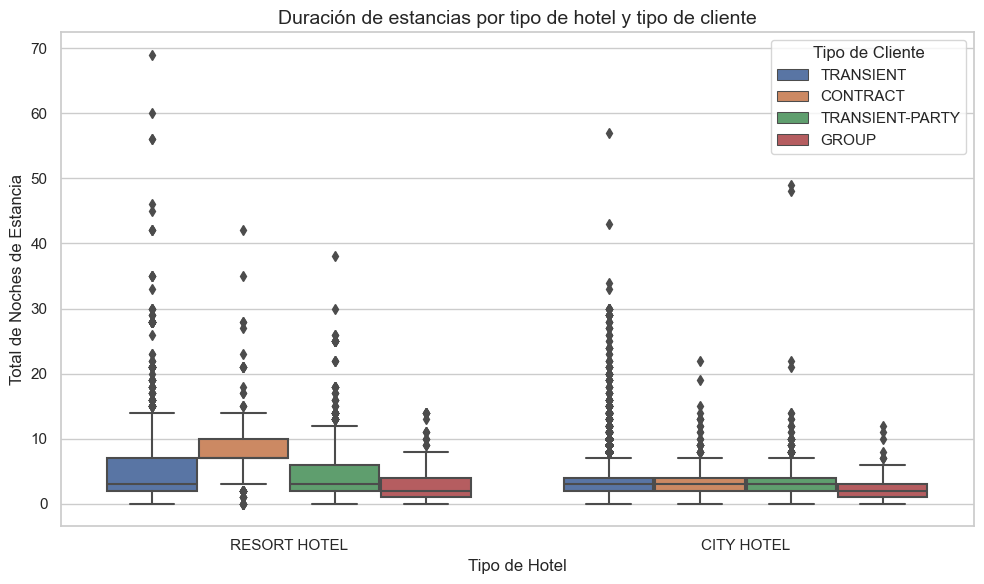

In [123]:
# Crear una columna adicional que sume las noches entre semana y fin de semana
df_hotel_bookings['total_stays'] = df_hotel_bookings['stays_in_week_nights'] + df_hotel_bookings['stays_in_weekend_nights']

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un boxplot multivariado con seaborn
sns.boxplot(x='hotel', y='total_stays', hue='customer_type', data=df)

# Añadir títulos y etiquetas
plt.title('Duración de estancias por tipo de hotel y tipo de cliente', fontsize=14)
plt.xlabel('Tipo de Hotel', fontsize=12)
plt.ylabel('Total de Noches de Estancia', fontsize=12)

# Mostrar el gráfico
plt.legend(title='Tipo de Cliente')
plt.tight_layout()
plt.show()

Los clientes en los Resort Hotels suelen quedarse más noches en comparación con los City Hotels, especialmente los clientes Contract y Transient.
Clientes Transient son los que tienen la mayor variabilidad en la duración de las estancias en ambos tipos de hotel, con una distribución que presenta varios valores atípicos (outliers) por encima de las 20 noches.

## Análisis adicional

In [125]:
#estadisticas descriptivas
resumen = df_hotel_bookings['stays_in_week_nights'].describe() # medidas de tendencia central de la variable númerica "stays_in_week_nights".

IQR = resumen.loc['75%'] - resumen.loc['25%'] #calculo del IQR. Esta métrica nos indica que tan disperso estan los valores de la mediana.
print("Resumen estadístico general estancias:")
print(resumen) #imprimir resumen

print("\nRango Intercuartílico (IQR):") #imprimir el IQR
print(IQR)

Resumen estadístico general estancias:
count    87396.000000
mean         2.625395
std          2.053584
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: stays_in_week_nights, dtype: float64

Rango Intercuartílico (IQR):
3.0


Tendencia de Reservas con Lead Time Largo: En la gráfica de dispersión, se observa que los hoteles tipo Resort tienden a tener algunas reservas con lead time muy largo (hasta 700 días), mientras que en los City Hotels es menos común ver reservas con tanto tiempo de anticipación.